In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing the data directly from google sheet
sheet_id = '1PXx2otaueJOL5VtWxPmLzqipSmkwIXLUY7_iUHmL9Ag'
sheet_name = 'Plain_data_Mirror'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [3]:
spend_data = pd.read_csv(url, parse_dates = ['Date'], infer_datetime_format = True) 
spend_data['Date'] = pd.to_datetime(spend_data['Date'], format='%Y-%m-%d')

In [4]:
# Visualizing
spend_data.head()

Date         Day  Airtime  amount_on_data  amount_of_data  Others  \
0 2022-09-04     Sunday       0.0             NaN             0.0  2000.0   
1 2022-09-05     Monday     800.0           600.0             3.0   300.0   
2 2022-09-06    Tuesday     300.0           300.0             1.5   800.0   
3 2022-09-07  Wednesday     300.0           300.0             1.5    50.0   
4 2022-09-08   Thursday       0.0             NaN             NaN   650.0   

                              description of others  withdrew  
0                                       Paid Chioma    5000.0  
1                                       eggs, ebuka       0.0  
2                buscuits, water, egg, borrowed mum       0.0  
3                                       Gave chioma    3000.0  
4  bought beans, bought biscuits, bought pure water       0.0

## Data Cleaning

In [5]:
# data type check 
spend_data.info()

# changed the date to datetime, every other thing seems correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   129 non-null    datetime64[ns]
 1   Day                    129 non-null    object        
 2   Airtime                107 non-null    float64       
 3   amount_on_data         103 non-null    float64       
 4   amount_of_data         104 non-null    float64       
 5   Others                 90 non-null     float64       
 6   description of others  105 non-null    object        
 7   withdrew               55 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 8.2+ KB


Text(0, 0.5, 'Number of missing values')

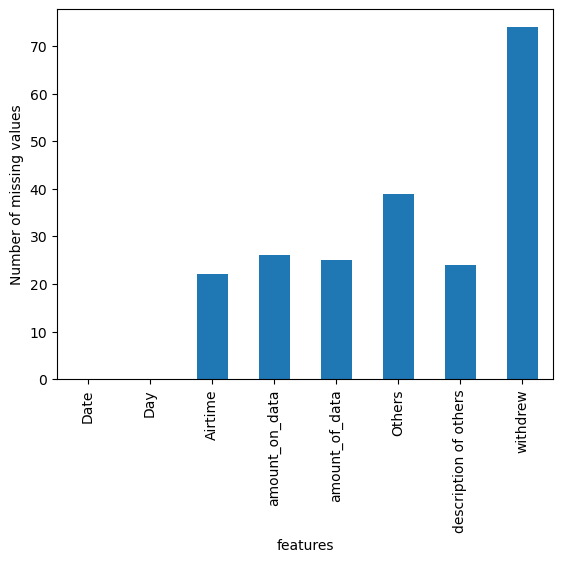

In [6]:
# I made this data so i know which columms have missing values or not. But confirming anyways
spend_data.isna().sum().plot(kind= 'bar')
plt.xlabel('features')
plt.ylabel('Number of missing values')

I know why these values are missing, so i'll fill na with 0

In [7]:
# Filling missing values
spend_data.fillna(0, inplace= True)

In [8]:
# Confirmation
spend_data.isna().sum().sum()

0

## Feature Creation

In [9]:
spend_data.head()

Date         Day  Airtime  amount_on_data  amount_of_data  Others  \
0 2022-09-04     Sunday       0.0             0.0             0.0  2000.0   
1 2022-09-05     Monday     800.0           600.0             3.0   300.0   
2 2022-09-06    Tuesday     300.0           300.0             1.5   800.0   
3 2022-09-07  Wednesday     300.0           300.0             1.5    50.0   
4 2022-09-08   Thursday       0.0             0.0             0.0   650.0   

                              description of others  withdrew  
0                                       Paid Chioma    5000.0  
1                                       eggs, ebuka       0.0  
2                buscuits, water, egg, borrowed mum       0.0  
3                                       Gave chioma    3000.0  
4  bought beans, bought biscuits, bought pure water       0.0

In [10]:
spend_data['Total_amount_spent'] = spend_data['Airtime'] + spend_data['Others']

## EDA

In [11]:
# This first Analysis is for september
sept = spend_data.copy()
sept = sept[sept['Date']<= '09/30/2022']

In [12]:
sept

Date         Day  Airtime  amount_on_data  amount_of_data   Others  \
0  2022-09-04     Sunday       0.0             0.0             0.0   2000.0   
1  2022-09-05     Monday     800.0           600.0             3.0    300.0   
2  2022-09-06    Tuesday     300.0           300.0             1.5    800.0   
3  2022-09-07  Wednesday     300.0           300.0             1.5     50.0   
4  2022-09-08   Thursday       0.0             0.0             0.0    650.0   
5  2022-09-09     Friday     300.0           300.0             1.5    300.0   
6  2022-09-10   Saturday     400.0           300.0             1.5  14650.0   
7  2022-09-11     Sunday       0.0             0.0             0.0    100.0   
8  2022-09-12     Monday     400.0           300.0             1.5    100.0   
9  2022-09-13    Tuesday       0.0             0.0             0.0      0.0   
10 2022-09-14  Wednesday    1000.0           600.0             3.0   1100.0   
11 2022-09-15   Thursday     300.0           300.0             1.5   2200.0   
12 2022-09-16     Friday       0.0             0.0             0.0   2650.0   
13 2022-09-17   Saturday    1000.0           300.0             1.5    250.0   
14 2022-09-18     Sunday       0.0           300.0             1.5    750.0   
15 2022-09-19     Monday       0.0             0.0             0.0      0.0   
16 2022-09-20    Tuesday     300.0           300.0             1.5    400.0   
17 2022-09-21  Wednesday     700.0           300.0             1.5    500.0   
18 2022-09-22   Thursday       0.0           300.0             1.5    300.0   
19 2022-09-23     Friday     500.0           300.0             1.5    300.0   
20 2022-09-24   Saturday     200.0           300.0             1.5    500.0   
21 2022-09-25     Sunday       0.0             0.0             0.0      0.0   
22 2022-09-26     Monday    1000.0           900.0             4.5      0.0   
23 2022-09-27    Tuesday     700.0           300.0             1.5    150.0   
24 2022-09-28  Wednesday       0.0           300.0             1.5      0.0   
25 2022-09-29   Thursday     500.0           600.0             3.0    200.0   
26 2022-09-30     Friday     700.0           600.0             3.0    200.0   

                                description of others  withdrew  \
0                                         Paid Chioma    5000.0   
1                                         eggs, ebuka       0.0   
2                  buscuits, water, egg, borrowed mum       0.0   
3                                         Gave chioma    3000.0   
4    bought beans, bought biscuits, bought pure water       0.0   
5                        bought beans, paid for akara       0.0   
6                                             nothing   14000.0   
7                                             Chruch        0.0   
8                                          gave ebuka       0.0   
9                                             nothing       0.0   
10                             paid gift, Chioma took    2000.0   
11                                               bama    2200.0   
12                                          Ice Cream    4600.0   
13                                         pure water       0.0   
14  transport to church, offering, transport back,...       0.0   
15                                            nothing       0.0   
16                              transport to hospital     500.0   
17                              transport to hospital    3000.0   
18                               puff puff and sprite       0.0   
19                               puff puff and sprite       0.0   
20                                puff puff and drink       0.0   
21                                            nothing    3000.0   
22                                            nothing       0.0   
23                                         pure water       0.0   
24                                            nothing       0.0   
25                                            indomie 

In [13]:
# quick check, total withdrawal shouldn't be soo much more than total amount
print('Total amount spent is {} while total amount withdrawn is {}'.format(sept['Total_amount_spent'].sum(),
                                                                           sept['withdrew'].sum()))

# The data is incorrect by a bit but it's correct enough for the sake of my analysis

Total amount spent is 37850.0 while total amount withdrawn is 37300.0


(array([19240., 19244., 19248., 19252., 19256., 19260., 19264., 19266.]),
 [Text(19240.0, 0, '2022-09-05'),
  Text(19244.0, 0, '2022-09-09'),
  Text(19248.0, 0, '2022-09-13'),
  Text(19252.0, 0, '2022-09-17'),
  Text(19256.0, 0, '2022-09-21'),
  Text(19260.0, 0, '2022-09-25'),
  Text(19264.0, 0, '2022-09-29'),
  Text(19266.0, 0, '2022-10-01')])

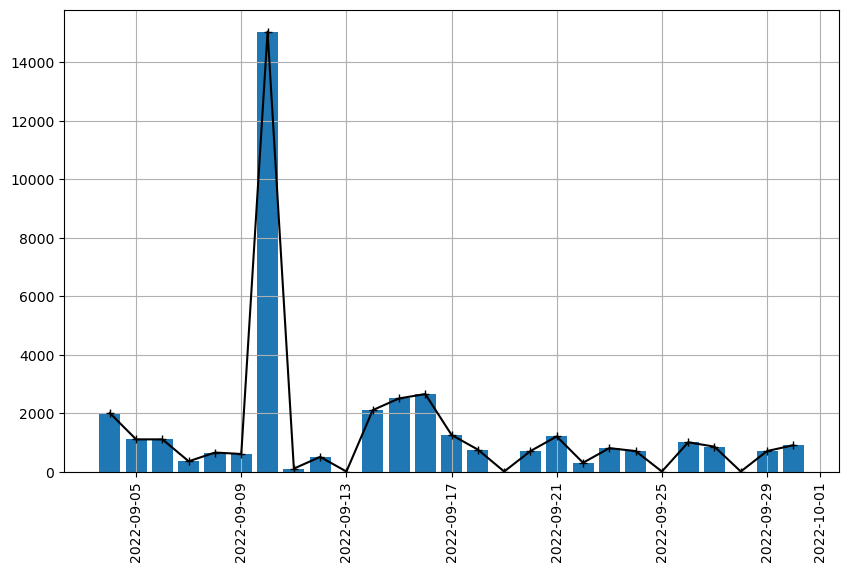

In [14]:
# 1. Line and bar plot of total amount spent overtime
plt.figure(figsize= (10,6))
plt.bar(sept['Date'], sept['Total_amount_spent'])
plt.plot(sept['Date'], sept['Total_amount_spent'], color = 'k', marker = '+')
plt.grid()
plt.xticks(rotation = 90)

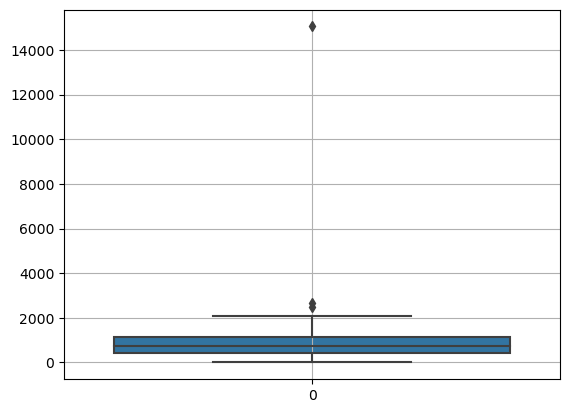

In [15]:
# It seems values above 2000 are outliers, let's see the box plot
sns.boxplot(sept['Total_amount_spent'])
plt.grid()

In [16]:
# summary statistics values and confirming the top whisker value
twfifth_perc = np.percentile(sept['Total_amount_spent'], 25)
fifth_perc = np.percentile(sept['Total_amount_spent'], 50)
seventyfifth_perc = np.percentile(sept['Total_amount_spent'], 75)

top_whisker =  seventyfifth_perc + 1.5*(seventyfifth_perc - twfifth_perc)

print('Twenty_fifth percentile spending is', twfifth_perc, '\n' + 'Median spending is', fifth_perc, '\n' +
     'Seventy_fifth percentile spending is', seventyfifth_perc,'\n' + 'Topwhisker is', top_whisker)


Twenty_fifth percentile spending is 425.0 
Median spending is 750.0 
Seventy_fifth percentile spending is 1150.0 
Topwhisker is 2237.5


In [17]:
# so at around 75% of the times, I spend 1150.

In [18]:
# Let's see what days are outliers
sept[sept['Total_amount_spent'] >= top_whisker]

Date        Day  Airtime  amount_on_data  amount_of_data   Others  \
6  2022-09-10  Saturday     400.0           300.0             1.5  14650.0   
11 2022-09-15  Thursday     300.0           300.0             1.5   2200.0   
12 2022-09-16    Friday       0.0             0.0             0.0   2650.0   

   description of others  withdrew  Total_amount_spent  
6                nothing   14000.0             15050.0  
11                  bama    2200.0              2500.0  
12             Ice Cream    4600.0              2650.0

These days I clearly bought specific stuff. So i won't use them for my analysis

In [19]:
# Non outlier days
sept_NO = sept[sept['Total_amount_spent'] < 2000]


In [20]:
sept_NO
# because the data is small I could use my eyes to see that there are no days where I did specific stuff here, on some days,
# i paid some people, so they count as outliers, so i choose values < 2000 as non outliers

Date         Day  Airtime  amount_on_data  amount_of_data  Others  \
1  2022-09-05     Monday     800.0           600.0             3.0   300.0   
2  2022-09-06    Tuesday     300.0           300.0             1.5   800.0   
3  2022-09-07  Wednesday     300.0           300.0             1.5    50.0   
4  2022-09-08   Thursday       0.0             0.0             0.0   650.0   
5  2022-09-09     Friday     300.0           300.0             1.5   300.0   
7  2022-09-11     Sunday       0.0             0.0             0.0   100.0   
8  2022-09-12     Monday     400.0           300.0             1.5   100.0   
9  2022-09-13    Tuesday       0.0             0.0             0.0     0.0   
13 2022-09-17   Saturday    1000.0           300.0             1.5   250.0   
14 2022-09-18     Sunday       0.0           300.0             1.5   750.0   
15 2022-09-19     Monday       0.0             0.0             0.0     0.0   
16 2022-09-20    Tuesday     300.0           300.0             1.5   400.0   
17 2022-09-21  Wednesday     700.0           300.0             1.5   500.0   
18 2022-09-22   Thursday       0.0           300.0             1.5   300.0   
19 2022-09-23     Friday     500.0           300.0             1.5   300.0   
20 2022-09-24   Saturday     200.0           300.0             1.5   500.0   
21 2022-09-25     Sunday       0.0             0.0             0.0     0.0   
22 2022-09-26     Monday    1000.0           900.0             4.5     0.0   
23 2022-09-27    Tuesday     700.0           300.0             1.5   150.0   
24 2022-09-28  Wednesday       0.0           300.0             1.5     0.0   
25 2022-09-29   Thursday     500.0           600.0             3.0   200.0   
26 2022-09-30     Friday     700.0           600.0             3.0   200.0   

                                description of others  withdrew  \
1                                         eggs, ebuka       0.0   
2                  buscuits, water, egg, borrowed mum       0.0   
3                                         Gave chioma    3000.0   
4    bought beans, bought biscuits, bought pure water       0.0   
5                        bought beans, paid for akara       0.0   
7                                             Chruch        0.0   
8                                          gave ebuka       0.0   
9                                             nothing       0.0   
13                                         pure water       0.0   
14  transport to church, offering, transport back,...       0.0   
15                                            nothing       0.0   
16                              transport to hospital     500.0   
17                              transport to hospital    3000.0   
18                               puff puff and sprite       0.0   
19                               puff puff and sprite       0.0   
20                                puff puff and drink       0.0   
21                                            nothing    3000.0   
22                                            nothing       0.0   
23                                         pure water       0.0   
24                                            nothing       0.0   
25                                            indomie       0.0   
26                                              akara       0.0   

    Total_amount_spent  
1               1100.0  
2               1100.0  
3                350.0  
4                650.0  
5                600.0  
7                100.0  
8                500.0  
9                  0.0  
13              1250.0  
14               750.0  
15                 0.0  
16               700.0  
17              1200.0  
18               300.0  
19               800.0  
20               700.0  
21                 0.0  
22              1000.0  
23               850.0  
24                 0.0  
25               700.0  
26               900.0

## Analysis on cash (Outliers removed)

In [21]:
# let's see the average daily spend
sept_NO.describe()

Airtime  amount_on_data  amount_of_data      Others     withdrew  \
count    22.000000       22.000000       22.000000   22.000000    22.000000   
mean    350.000000      300.000000        1.500000  265.909091   431.818182   
std     343.303281      226.778684        1.133893  246.589288  1049.891769   
min       0.000000        0.000000        0.000000    0.000000     0.000000   
25%       0.000000      300.000000        1.500000   62.500000     0.000000   
50%     300.000000      300.000000        1.500000  225.000000     0.000000   
75%     650.000000      300.000000        1.500000  375.000000     0.000000   
max    1000.000000      900.000000        4.500000  800.000000  3000.000000   

       Total_amount_spent  
count           22.000000  
mean           615.909091  
std            410.396546  
min              0.000000  
25%            312.500000  
50%            700.000000  
75%            887.500000  
max           1250.000000

I can't accept this any of the means mean, I'd rather say i expect to spend around 300 on data, 500 on others and each day 800

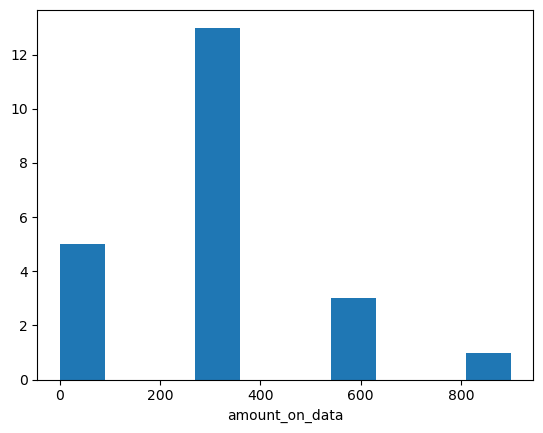

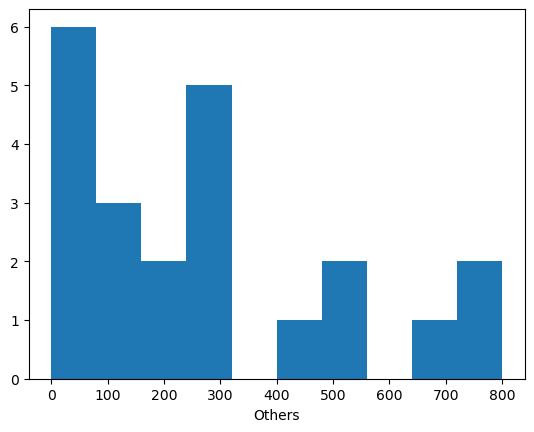

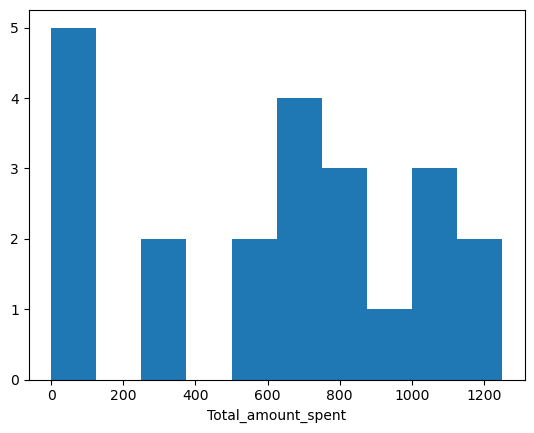

In [22]:
# histograms
for x in ['amount_on_data', 'Others', 'Total_amount_spent']:
    plt.hist(sept_NO[x])
    plt.xlabel(x)
    plt.show()

From these plots, I'll stick to my former assumptions because most times i spend <= 300 on data and <=500 on others and <800 as total

In [23]:
# 1. Total amount spent for the month
print('Total amount spent for the month without outliers is {}'.format(sept_NO['Total_amount_spent'].sum()))

Total amount spent for the month without outliers is 13550.0


Total_Airtime  Total_Others
0         7700.0        5850.0

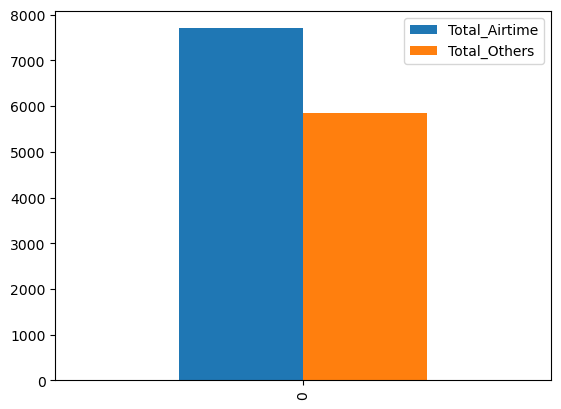

In [24]:
# 2. What took most of the cash, Others or Airtime ?
cash_dist = pd.DataFrame({'Total_Airtime':[sept_NO['Airtime'].sum()], 'Total_Others':[sept_NO['Others'].sum()]})
cash_dist.plot(kind= 'bar')
cash_dist

Without the outlier days, it seems I spent more on airtime, however this isn't the total amount I spent on airtime, I'll  make the same plot below to just see the total amount I spent on airtime

Total_Airtime  Total_Others
0         9400.0       28450.0

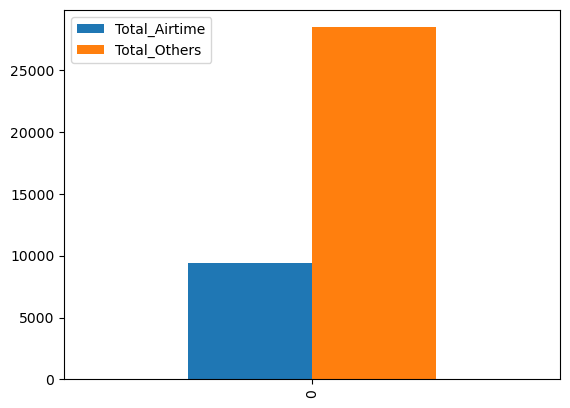

In [25]:
# 2. What took most of the cash, Others or Airtime ?
cash_dist = pd.DataFrame({'Total_Airtime':[sept['Airtime'].sum()], 'Total_Others':[sept['Others'].sum()]})
cash_dist.plot(kind= 'bar')
cash_dist

#### In total, I spent 9400 on Airtime for the month.

In [26]:
# 3. How much of the airtime was spent on data ?
print('You spent {} on airtime and {} on data, so you spent {}% of airtime on data'.format(sept['Airtime'].sum(), 
                                                                                           sept['amount_on_data'].sum(), 
                                                                                           round((sept['amount_on_data'].sum()/
                                                                                            (sept['Airtime'].sum())*100)),2))

You spent 9400.0 on airtime and 7800.0 on data, so you spent 83% of airtime on data


#### So I actually spent 8000 on data in my opinion 1400 is too much to waste

In [27]:
# 4. How much data did you use for the month ?
print('You bought {}gb in this month'.format(sept['amount_of_data'].sum()))

You bought 39.0gb in this month


In [28]:
# 5. How much did you buy 1gb of data ?
print('You bought 1gb for apx {}'.format(sept['amount_on_data'].sum()/sept['amount_of_data'].sum()))

You bought 1gb for apx 200.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '2022-09-04Sunday '),
  Text(1, 0, '2022-09-05Monday '),
  Text(2, 0, '2022-09-06Tuesday '),
  Text(3, 0, '2022-09-07Wednesday '),
  Text(4, 0, '2022-09-08Thursday '),
  Text(5, 0, '2022-09-09Friday '),
  Text(6, 0, '2022-09-10Saturday '),
  Text(7, 0, '2022-09-11Sunday '),
  Text(8, 0, '2022-09-12Monday '),
  Text(9, 0, '2022-09-13Tuesday '),
  Text(10, 0, '2022-09-14Wednesday '),
  Text(11, 0, '2022-09-15Thursday '),
  Text(12, 0, '2022-09-16Friday '),
  Text(13, 0, '2022-09-17Saturday '),
  Text(14, 0, '2022-09-18Sunday '),
  Text(15, 0, '2022-09-19Monday '),
  Text(16, 0, '2022-09-20Tuesday '),
  Text(17, 0, '2022-09-21Wednesday '),
  Text(18, 0, '2022-09-22Thursday '),
  Text(19, 0, '2022-09-23Friday '),
  Text(20, 0, '2022-09-24Saturday '),
  Text(21, 0, '2022-09-25Sunday '),
  Text(22, 0, '2022-09-26Monday '),
  Tex

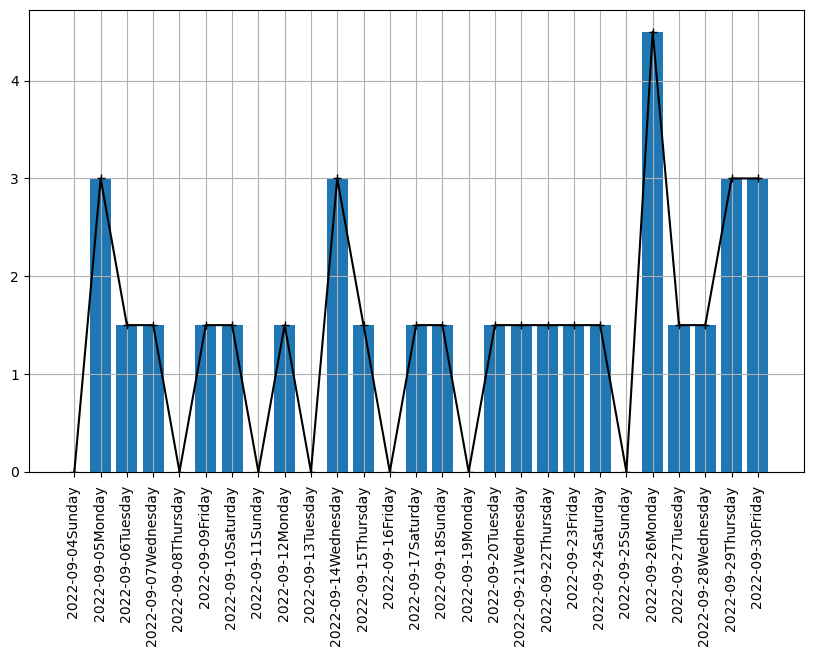

In [29]:
# 6. Did you buy more data at some periods ? like towards the end of the week ?
plt.figure(figsize= (10,6))
plt.bar(sept['Date'].astype('str')+sept['Day'], sept['amount_of_data'])
plt.plot(sept['Date'].astype('str')+sept['Day'], sept['amount_of_data'], color = 'k', marker = '+')
plt.grid()
plt.xticks(rotation = 90)

In [30]:
# a 3 days rolling average should show this better as 0gb days would affect the average 
sept['amount_of_data'].rolling(2).mean()

0      NaN
1     1.50
2     2.25
3     1.50
4     0.75
5     0.75
6     1.50
7     0.75
8     0.75
9     0.75
10    1.50
11    2.25
12    0.75
13    0.75
14    1.50
15    0.75
16    0.75
17    1.50
18    1.50
19    1.50
20    1.50
21    0.75
22    2.25
23    3.00
24    1.50
25    2.25
26    3.00
Name: amount_of_data, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '2022-09-04Sunday '),
  Text(1, 0, '2022-09-05Monday '),
  Text(2, 0, '2022-09-06Tuesday '),
  Text(3, 0, '2022-09-07Wednesday '),
  Text(4, 0, '2022-09-08Thursday '),
  Text(5, 0, '2022-09-09Friday '),
  Text(6, 0, '2022-09-10Saturday '),
  Text(7, 0, '2022-09-11Sunday '),
  Text(8, 0, '2022-09-12Monday '),
  Text(9, 0, '2022-09-13Tuesday '),
  Text(10, 0, '2022-09-14Wednesday '),
  Text(11, 0, '2022-09-15Thursday '),
  Text(12, 0, '2022-09-16Friday '),
  Text(13, 0, '2022-09-17Saturday '),
  Text(14, 0, '2022-09-18Sunday '),
  Text(15, 0, '2022-09-19Monday '),
  Text(16, 0, '2022-09-20Tuesday '),
  Text(17, 0, '2022-09-21Wednesday '),
  Text(18, 0, '2022-09-22Thursday '),
  Text(19, 0, '2022-09-23Friday '),
  Text(20, 0, '2022-09-24Saturday '),
  Text(21, 0, '2022-09-25Sunday '),
  Text(22, 0, '2022-09-26Monday '),
  Tex

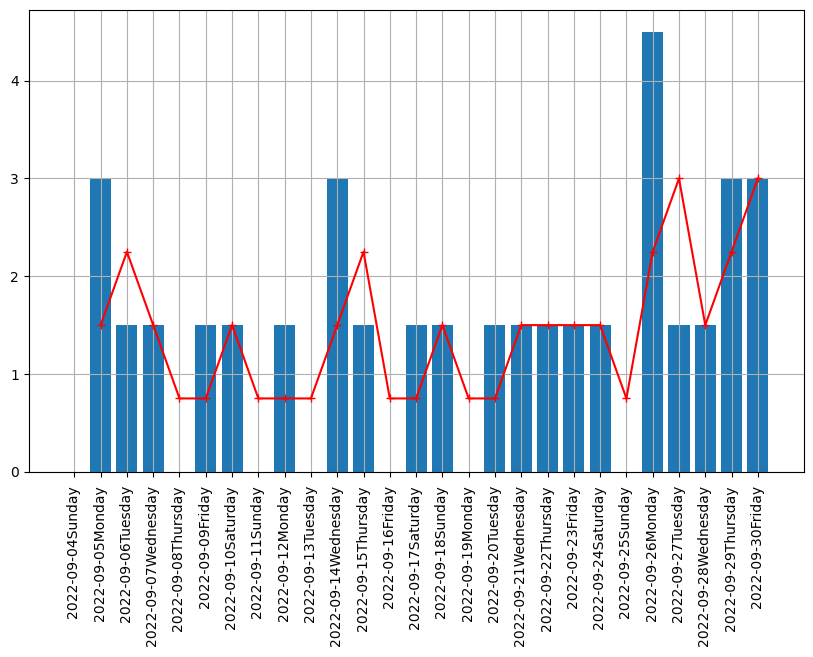

In [31]:
plt.figure(figsize= (10,6))
plt.bar(sept['Date'].astype('str')+sept['Day'], sept['amount_of_data'])
plt.plot(sept['Date'].astype('str')+sept['Day'], sept['amount_of_data'].rolling(2).mean(), color = 'r', marker = '+')
sept['amount_of_data'].rolling(2).mean()
plt.grid()
plt.xticks(rotation = 90)

In [32]:
sept['rolling_amount_of_data'] = sept['amount_of_data'].rolling(2).mean()

### For the 2 days rolling average there's something it's telling, on most days, i buy 1.5gb days where the rolling avg is 0.75 means i didn't buy data on that day or the previous day

<Axes: >

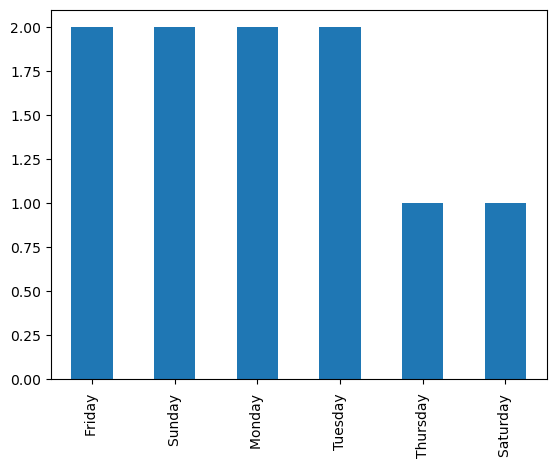

In [33]:
# days where rolling is 0.75
sept[sept.rolling_amount_of_data == 0.75][['Day']].Day.value_counts().plot(kind = 'bar')

Using all plots above I can deduce that I don't consume much data on sundays that's what made monday appear here since I used a rolling avg wednesday doesn't appear here, so that mean at midweek is when my data consumption is max i always buy data on days leading to and after wednesday so Tuesday, wednesday and thursday are data consumption days.

<Axes: xlabel='Day'>

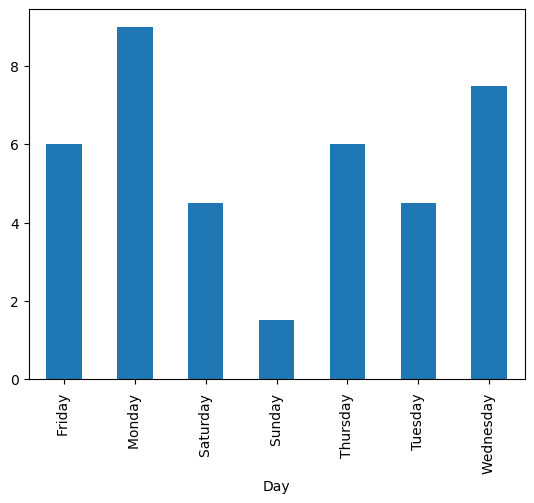

In [34]:
# confirmation
sept.groupby('Day')['amount_of_data'].sum().plot(kind= 'bar')

<Axes: xlabel='Day'>

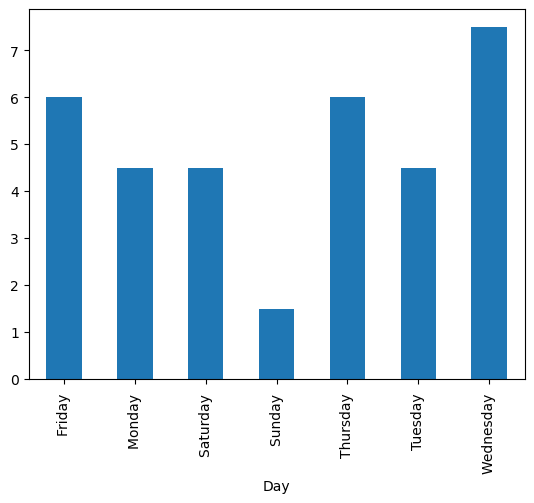

In [35]:
# this suggests other wise, but there's actually an outlier monday. I remember I did a test and had to download couple stuff 
# that day, so more data consumption, I'll drop that day and plot again
sept[sept.amount_of_data <= 3].groupby('Day')['amount_of_data'].sum().plot(kind= 'bar')

# It seems I buy the most data on wed, thur and friday and I don't buy much data on sundays that's probably because of the data
# i buy on saturdays but it's total of 4.5gb so for both saturday and sunday I bought 6gb so we see I actually use the least 
# data on weekends. 

## Viewing Outlier days

In [36]:
sept[sept['Total_amount_spent'] >= 2000]


Date         Day  Airtime  amount_on_data  amount_of_data   Others  \
0  2022-09-04     Sunday       0.0             0.0             0.0   2000.0   
6  2022-09-10   Saturday     400.0           300.0             1.5  14650.0   
10 2022-09-14  Wednesday    1000.0           600.0             3.0   1100.0   
11 2022-09-15   Thursday     300.0           300.0             1.5   2200.0   
12 2022-09-16     Friday       0.0             0.0             0.0   2650.0   

     description of others  withdrew  Total_amount_spent  \
0              Paid Chioma    5000.0              2000.0   
6                  nothing   14000.0             15050.0   
10  paid gift, Chioma took    2000.0              2100.0   
11                    bama    2200.0              2500.0   
12               Ice Cream    4600.0              2650.0   

    rolling_amount_of_data  
0                      NaN  
6                     1.50  
10                    1.50  
11                    2.25  
12                    0.75

Total Summary
1. I used 37850.0  for the month with outlier spending and 13550.0 without outliers however the outlier removal also affected the airtime I bought on the outlier days.
2. More truly, I used 9400 + 5850 = 15,250 for the month and more was used to buy airtime than to do others.
3. Out of the airtime cash I used 7800 on data and 1600 on probably night plan. But I have to be sure. 
4. I expect to spent 800 each day with 300 on data and 500 on others.

On Data
5. I used total of 39gb in the month which cost me exactly 7800.
6. I consume the most data on wed, thur and friday and least on weekends.
7. I expect to use 1.5gb each day (I just accepted the mean).

Recommendations
1. Monitor your spendings on outlier things like bama, etc. Actually the serious outlier thing here was bama and money I borrowed from gift. The largest outlier was because i went to market. Ice cream was for Ebuka. 
2. You should be buying the 6000 for 45gb, preferably buy it on friday so it'll compile well before wednesday (data consumption days). It's far better to buy this plan.



## Creating a function to show me all necessary Visualizations and give a report.

In [37]:

def report(data, month_start, month_end):
    # This generates a report for the period entered and gives you a summary. I advice you enter a duration on min 25 days
    
    # feature creation
    month = data[np.logical_and(data['Date'] >= month_start, data['Date']<=month_end)]
    month['Total_amount_spent'] = month['Airtime'] + month['Others']
    
    # 1. Concerning total amount before and after outlier removal 
    print('1. Concerning total amount before and after outlier removal', '\n')
    print('Total amount spent is {} while total amount withdrawn is {}'.format(month['Total_amount_spent'].sum(),
                                                                           month['withdrew'].sum()))
    # distribution of total amou t over time
    plt.figure(figsize= (7,5.5))
    plt.bar(month['Date'], month['Total_amount_spent'])
    plt.plot(month['Date'], month['Total_amount_spent'], color = 'k', marker = '+')
    plt.xlabel('Time')
    plt.ylabel('Total amount')
    plt.grid()
    plt.xticks(rotation = 90)
    plt.show()
    
    # box plot
    sns.boxplot(x=month['Total_amount_spent'])
    plt.grid()
    plt.show()
    
    twfifth_perc = np.percentile(month['Total_amount_spent'], 25)
    fifth_perc = np.percentile(month['Total_amount_spent'], 50)
    seventyfifth_perc = np.percentile(month['Total_amount_spent'], 75)

    top_whisker =  seventyfifth_perc + 1.5*(seventyfifth_perc - twfifth_perc)

    print('Twenty_fifth percentile spending is', twfifth_perc, '\n' + 'Median spending is', fifth_perc, '\n' +
     'Seventy_fifth percentile spending is', seventyfifth_perc,'\n' + 'Topwhisker is', top_whisker)
    
    month_NO = month[month['Total_amount_spent'] < top_whisker]
    
    # 2 and 3 Data-Airtime relationship
    print('\n', '2 and 3 Data-Airtime relationship', '\n')
    cash_dist = pd.DataFrame({'Total_Airtime':[month_NO['Airtime'].sum()], 'Total_Others':[month_NO['Others'].sum()]})
    cash_dist.plot(kind= 'bar')
    plt.show()
    display(cash_dist)
    
    cash_dist = pd.DataFrame({'Total_Airtime':[month['Airtime'].sum()], 'Total_Others':[month['Others'].sum()]})
    cash_dist.plot(kind= 'bar')
    plt.show()
    display(cash_dist)
    
    print('You spent {} on airtime and {} on data, so you spent {}% of airtime on data'.format(month['Airtime'].sum(), 
                                                                                           month['amount_on_data'].sum(), 
                                                                                           round((month['amount_on_data'].sum()/
                                                                                            (month['Airtime'].sum())*100)),2))
    
     # see and know if you can accept the summary statistics
    print('\n', '4 and 7 see and know if you can accept the summary statistics')
    display(month_NO.describe())
    print('Total amount spent for the month without outliers is {}'.format(month_NO['Total_amount_spent'].sum()))
    
    # 5. Total Data Usage
    print('\n', '5. Total Data Usage', '\n')
    print('You bought {}gb in this month'.format(month['amount_of_data'].sum()))
    
    # 6. Data day Investigation
    print('\n', '6. Data day Investigation', '\n')
    plt.figure(figsize= (10,6))
    plt.bar(month['Date'].astype('str')+month['Day'], month['amount_of_data'])
    plt.plot(month['Date'].astype('str')+month['Day'], month['amount_of_data'].rolling(2).mean(), color = 'r', marker = '+')
    month['amount_of_data'].rolling(2).mean()
    plt.grid()
    plt.xticks(rotation = 90)
    plt.show()
    


In [38]:
spend_data

Date         Day  Airtime  amount_on_data  amount_of_data  Others  \
0   2022-09-04     Sunday       0.0             0.0             0.0  2000.0   
1   2022-09-05     Monday     800.0           600.0             3.0   300.0   
2   2022-09-06    Tuesday     300.0           300.0             1.5   800.0   
3   2022-09-07  Wednesday     300.0           300.0             1.5    50.0   
4   2022-09-08   Thursday       0.0             0.0             0.0   650.0   
..         ...         ...      ...             ...             ...     ...   
124 2023-01-06     Friday       0.0             0.0             0.0     0.0   
125 2023-01-07   Saturday       0.0             0.0             0.0     0.0   
126 2023-01-08     Sunday       0.0             0.0             0.0     0.0   
127 2023-01-09     Monday       0.0             0.0             0.0     0.0   
128 2023-01-10    Tuesday       0.0             0.0             0.0     0.0   

                                description of others  withdrew  \
0                                         Paid Chioma    5000.0   
1                                         eggs, ebuka       0.0   
2                  buscuits, water, egg, borrowed mum       0.0   
3                                         Gave chioma    3000.0   
4    bought beans, bought biscuits, bought pure water       0.0   
..                                                ...       ...   
124                                                 0       0.0   
125                                                 0       0.0   
126                                                 0       0.0   
127                                                 0       0.0   
128                                                 0       0.0   

     Total_amount_spent  
0                2000.0  
1                1100.0  
2                1100.0  
3                 350.0  
4                 650.0  
..                  ...  
124                 0.0  
125                 0.0  
126                 0.0  
127                 0.0  
128                 0.0  

[129 rows x 9 columns]

C:\Users\User\AppData\Local\Temp\ipykernel_22044\3062212392.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month['Total_amount_spent'] = month['Airtime'] + month['Others']


1. Concerning total amount before and after outlier removal 

Total amount spent is 21750.0 while total amount withdrawn is 29200.0


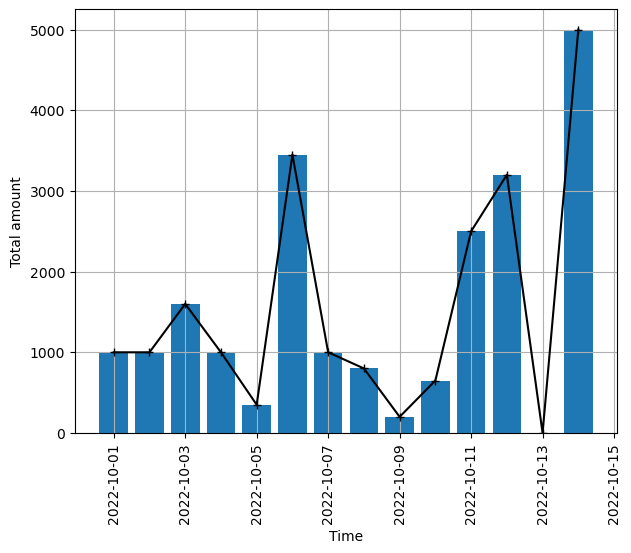

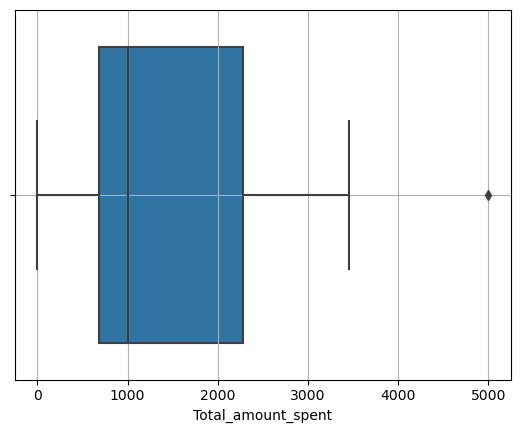

Twenty_fifth percentile spending is 687.5 
Median spending is 1000.0 
Seventy_fifth percentile spending is 2275.0 
Topwhisker is 4656.25

 2 and 3 Data-Airtime relationship 



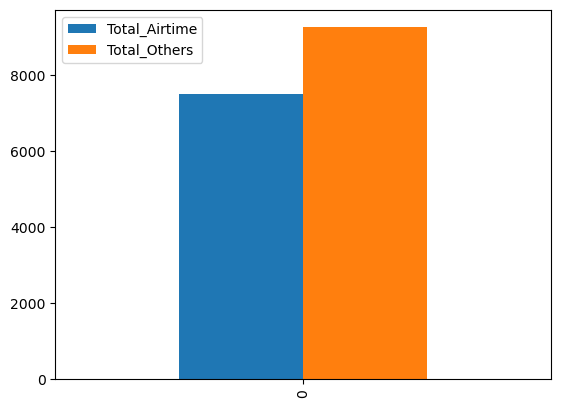

Total_Airtime  Total_Others
0         7500.0        9250.0

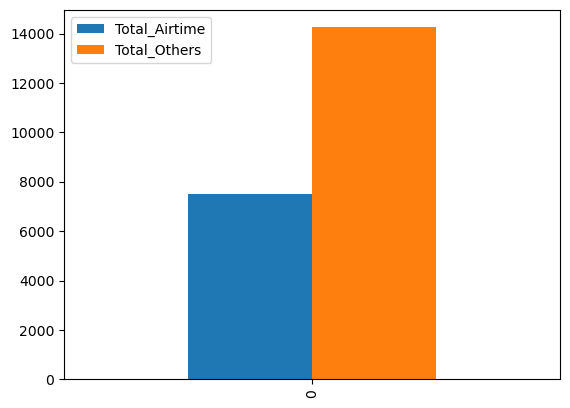

Total_Airtime  Total_Others
0         7500.0       14250.0

You spent 7500.0 on airtime and 4600.0 on data, so you spent 61% of airtime on data

 4 and 7 see and know if you can accept the summary statistics


Airtime  amount_on_data  amount_of_data       Others     withdrew  \
count    13.000000       13.000000       13.000000    13.000000    13.000000   
mean    576.923077      346.153846        1.500000   711.538462  1400.000000   
std     823.765588      258.571024        1.020621   879.193249  2004.993766   
min       0.000000        0.000000        0.000000     0.000000     0.000000   
25%       0.000000      100.000000        0.500000   200.000000     0.000000   
50%     500.000000      300.000000        1.500000   350.000000     0.000000   
75%     700.000000      650.000000        2.500000  1000.000000  2600.000000   
max    3000.000000      650.000000        3.000000  2600.000000  5000.000000   

       Total_amount_spent  
count           13.000000  
mean          1288.461538  
std           1102.866312  
min              0.000000  
25%            650.000000  
50%           1000.000000  
75%           1600.000000  
max           3450.000000

Total amount spent for the month without outliers is 16750.0

 5. Total Data Usage 

You bought 20.0gb in this month

 6. Data day Investigation 



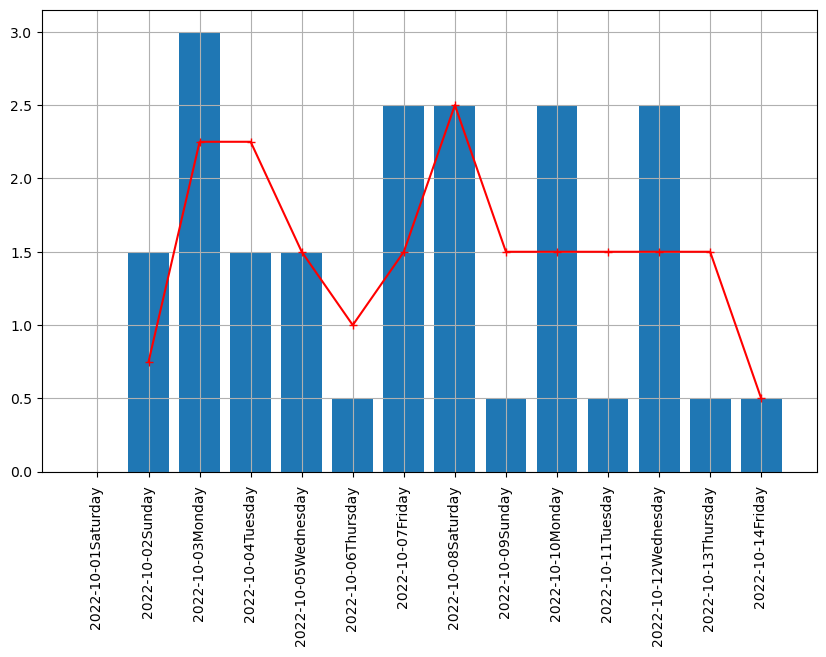

In [39]:
report(spend_data, '10/01/2022', '10/14/2022')

In [40]:
## something about october is that I have to wait till end of the month to know because I already did a 3000 withdrawal which 
# I haven't finished spreading over the month for example i boufht 3000 airtime with like 100per day, so before my spent on
# airtime will meet up, i'll need 30days. but it already seems I spend more this month

# also I've spent 4600 on data for half the month so i might end up spending 9200 at this rate i.e + 4600 more or let me say
# + 2600 more since i already have like 2000 naira data worth already paid for.


Now I was wondering if I should do the 6k sub now and I said yes, reason. If i don't let's say i spend probably >3000 on my current plan for the rest of the month and i buy the 6k next month that's 9k till end of next month. or buy it now and it lasts till middle of nextmonth and i can top it since i'm expected to use 40gb a month i'll have extra 5gb and then let's say it as 3k for 15 days, I'll still be using 9k from now till end of next month but this is clearly better since i'll probably spend more than 3k before this month runs out and no extra 5gb.

To continue with this 5500 for 2gb for the next month at 1.5gb per day and 40gb a mont it'll cost me 11000 next month. 

In [41]:
#1. Total amount comparison with outliers.```